<a href="https://colab.research.google.com/github/Rishardmunene/Stable-Diffusion-test/blob/main/Test_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 1: Install all dependencies
!pip install -q --upgrade diffusers transformers accelerate xformers safetensors ftfy
!pip install torch torchvision --index-url https://download.pytorch.org/whl/cu118
!pip install -q gradio wandb bitsandbytes==0.41.1
!huggingface-cli login  # You'll need to enter your HuggingFace token here
!pip install requests Pillow

Looking in indexes: https://download.pytorch.org/whl/cu118

    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token a

In [ ]:
import torch
print(f"GPU available: {torch.cuda.is_available()}")
print(f"Device type: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU'}")
print(f"CUDA version: {torch.version.cuda}")

GPU available: True
Device type: Tesla T4
CUDA version: 12.1


In [ ]:
# Cell 2: Import necessary libraries
import os
from PIL import Image
from google.colab import files
import torch
from diffusers import DiffusionPipeline, AutoencoderKL


In [ ]:
# Cell 3: Set up image processing
import os
from PIL import Image
from google.colab import files

# Create directories
os.makedirs("training_images", exist_ok=True)

# Upload and process training images
print("Upload training images...")
uploaded = files.upload()

for filename in uploaded.keys():
    save_path = f"./training_images/{filename}"
    with open(save_path, "wb") as f:
        f.write(uploaded[filename])
    img = Image.open(save_path)
    # SDXL prefers 1024x1024 images
    img = img.resize((1024, 1024), Image.Resampling.LANCZOS)
    img.save(save_path)
    print(f"Processed: {filename}")

Upload training images...


Saving landscape1.jpg to landscape1.jpg
Saving landscape2.jpg to landscape2.jpg
Saving landscape3.jpg to landscape3.jpg
Saving landscape4.jpg to landscape4.jpg
Saving landscape5.jpg to landscape5.jpg
Saving landscape6.jpg to landscape6.jpg
Saving landscape7.jpg to landscape7.jpg
Processed: landscape1.jpg
Processed: landscape2.jpg
Processed: landscape3.jpg
Processed: landscape4.jpg
Processed: landscape5.jpg
Processed: landscape6.jpg
Processed: landscape7.jpg


In [ ]:
# Cell 4: Download the correct training script
!wget -q https://raw.githubusercontent.com/huggingface/diffusers/v0.25.0/examples/dreambooth/train_dreambooth_lora_sdxl.py

!accelerate config default

Configuration already exists at /root/.cache/huggingface/accelerate/default_config.yaml, will not override. Run `accelerate config` manually or pass a different `save_location`.


In [ ]:
# Cell 6: Training command with optimized parameters
!accelerate launch train_dreambooth_lora_sdxl.py \
  --pretrained_model_name_or_path="stabilityai/stable-diffusion-xl-base-1.0" \
  --instance_data_dir="training_images" \
  --output_dir="fine_tuned_model" \
  --instance_prompt="a photo of a beautiful hilly landscape" \
  --resolution=1024 \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --learning_rate=1e-4 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --num_train_epochs=10 \
  --checkpointing_steps=100 \
  --gradient_checkpointing \
  --mixed_precision="fp16" \
  --enable_xformers_memory_efficient_attention \
  --use_8bit_adam \
  --rank=4

2024-12-07 14:23:52.580977: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-07 14:23:52.600897: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-07 14:23:52.606771: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-07 14:23:53.810264: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
12/07/2024 14:23:55 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

Mixed precision type: fp16

You are using a model of type clip_text_model to instantiate a model of ty

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

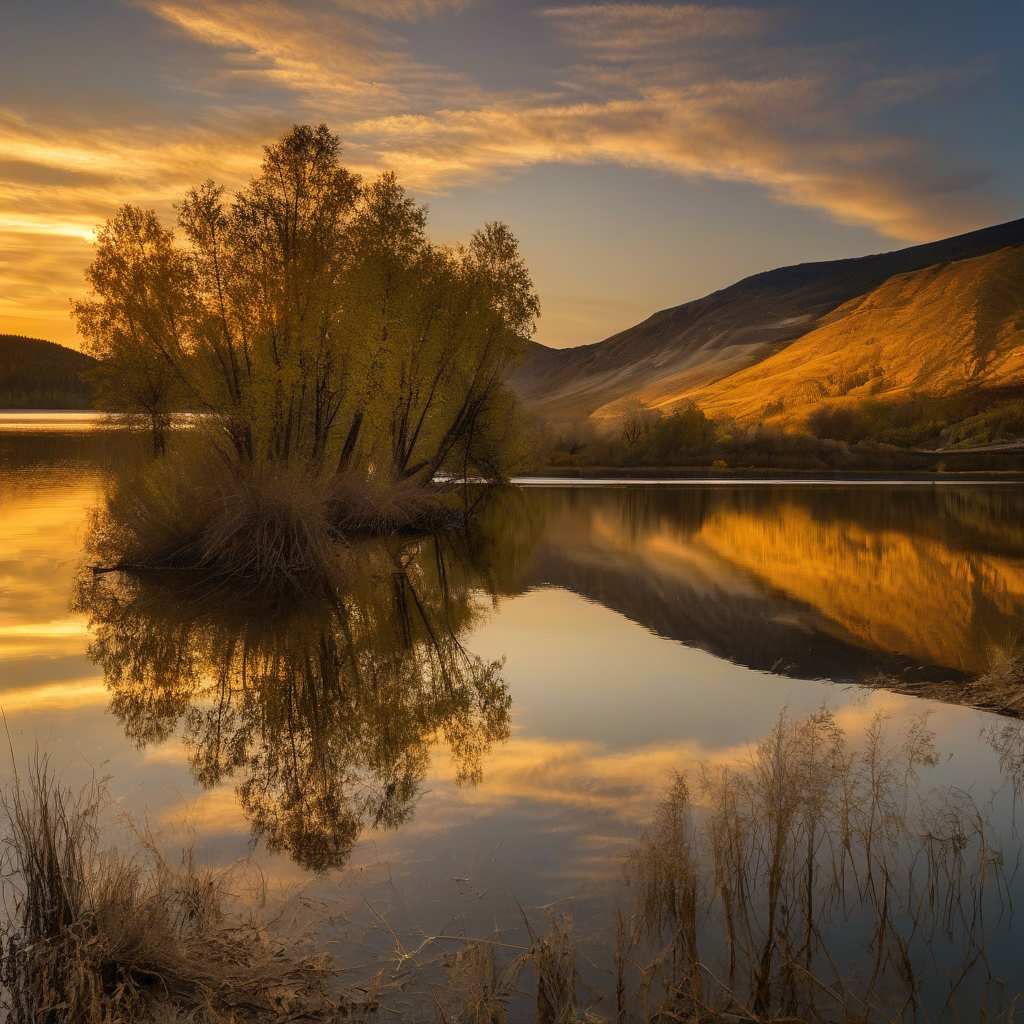

Generated and saved: generated_water_landscape_1.png
Prompt used: a photo of a serene lake surrounded by hills at golden sunset, reflections in water, detailed, natural, high quality



  0%|          | 0/30 [00:00<?, ?it/s]

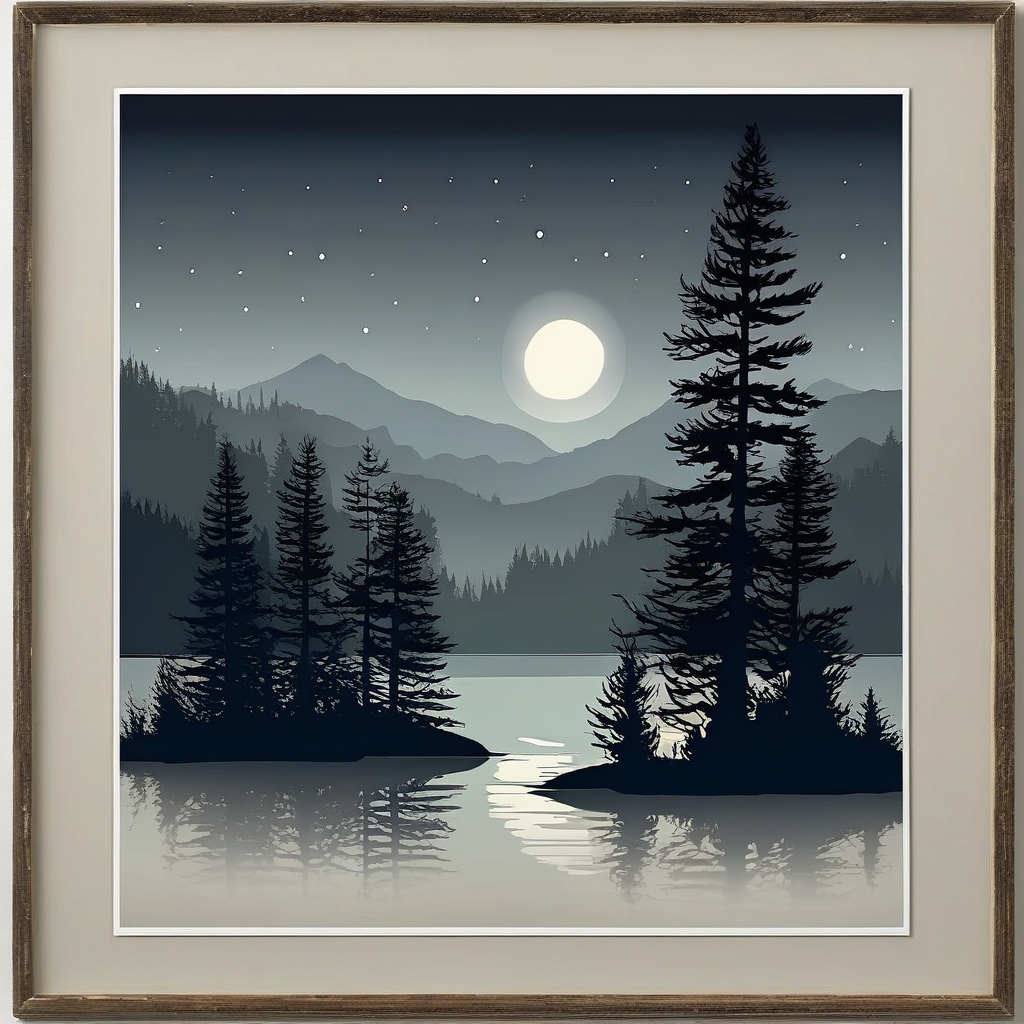

Generated and saved: generated_water_landscape_2.png
Prompt used: a photo of a misty mountain lake under moonlight, calm water surface, pine trees, detailed, natural, high quality



  0%|          | 0/30 [00:00<?, ?it/s]

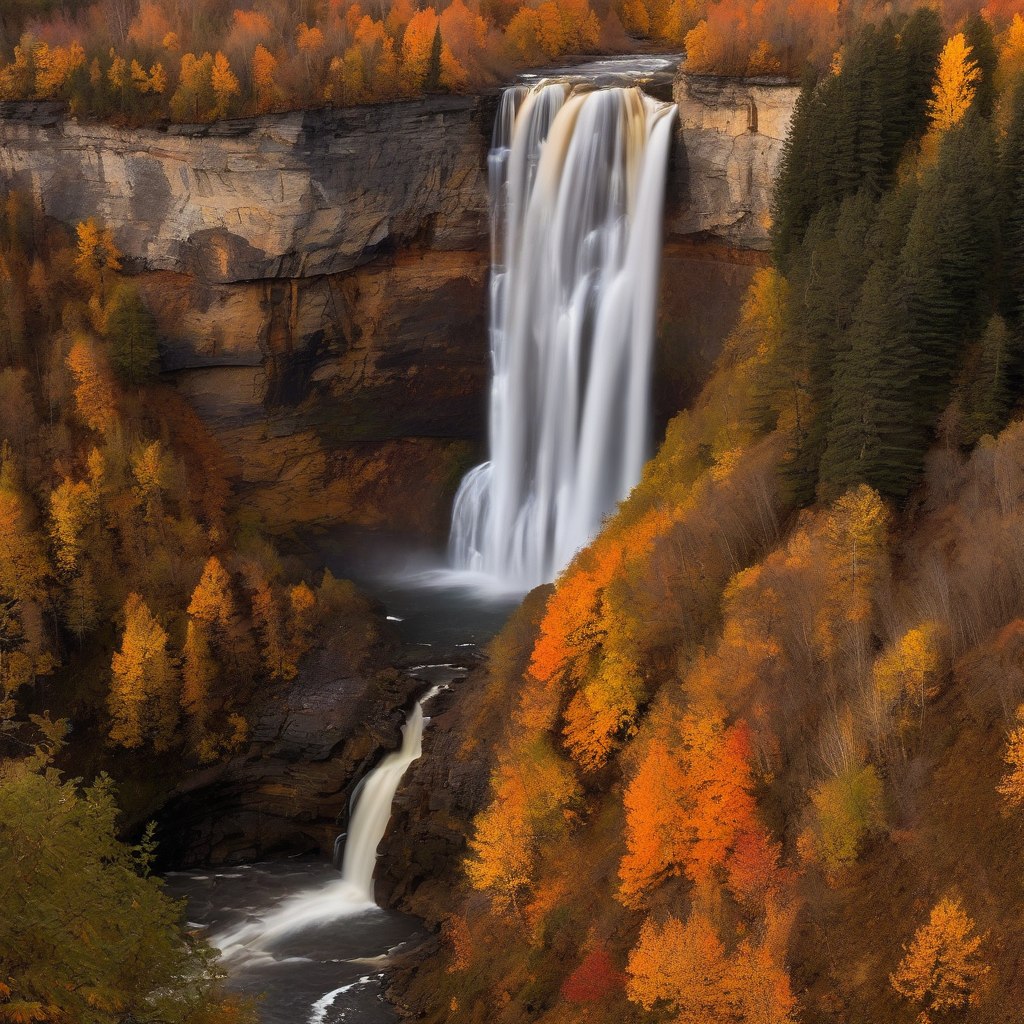

Generated and saved: generated_water_landscape_3.png
Prompt used: a photo of a dramatic waterfall cascading down autumn-colored cliffs, golden hour, detailed, realistic, high quality



In [ ]:
def test_model():
    # Load VAE and move to GPU first to save memory
    vae = AutoencoderKL.from_pretrained(
        "madebyollin/sdxl-vae-fp16-fix",
        torch_dtype=torch.float16
    )

    # Load the pipeline
    pipeline = DiffusionPipeline.from_pretrained(
        "stabilityai/stable-diffusion-xl-base-1.0",
        vae=vae,
        torch_dtype=torch.float16,
    )

    # Load LoRA weights
    pipeline.load_lora_weights("fine_tuned_model", weight_name="pytorch_lora_weights.safetensors")
    pipeline.to("cuda")

    # Enable memory efficient attention
    pipeline.enable_xformers_memory_efficient_attention()

    # Water-themed prompts
    prompts = [
        "a photo of a serene lake surrounded by hills at golden sunset, reflections in water, detailed, natural, high quality",
        "a photo of a misty mountain lake under moonlight, calm water surface, pine trees, detailed, natural, high quality",
        "a photo of a dramatic waterfall cascading down autumn-colored cliffs, golden hour, detailed, realistic, high quality"
    ]

    negative_prompt = "low quality, blurry, unrealistic, artificial, cartoon, anime, illustration"

    # Generate and save multiple images
    for i, prompt in enumerate(prompts):
        image = pipeline(
            prompt=prompt,
            negative_prompt=negative_prompt,
            num_inference_steps=30,
            guidance_scale=7.5
        ).images[0]

        # Save each image with a unique name
        filename = f"generated_water_landscape_{i+1}.png"
        image.save(filename)
        display(image)
        print(f"Generated and saved: {filename}")
        print(f"Prompt used: {prompt}\n")

# Run the test after training is complete
test_model()